In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read Data

df = pd.read_csv(r'C:\Users\Foste\Downloads\who_life_exp.csv')

In [2]:
# Look at Data

df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [3]:
# Data Types for Columns

df.dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

In [4]:
# Assign Numbers to Columns with Objects to Allow Correlation

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,3,1,0,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,3,1,0,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,3,1,0,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,3,1,0,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,3,1,0,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,90,92,5,2012,64.49448,16.57977,209.2666,0.055840,0.004845,6.29833,...,2.07638,6444.530,47.5,65.267,0.3,4570.0,22.7,1.82147,NaN,NaN
3107,90,92,5,2013,64.79716,16.64219,205.1459,0.055350,0.004600,6.42186,...,2.39985,6541.304,45.6,65.717,0.3,4980.0,NaN,3.23381,NaN,NaN
3108,90,92,5,2014,65.10757,16.70787,200.8204,0.054585,0.004405,6.64447,...,2.29846,6639.756,43.7,66.144,0.3,5440.0,NaN,2.93781,NaN,NaN
3109,90,92,5,2015,65.45008,16.77074,196.6613,0.053465,0.004160,6.83826,...,2.45366,6741.164,42.0,66.546,0.3,5810.0,NaN,NaN,84.66104,NaN


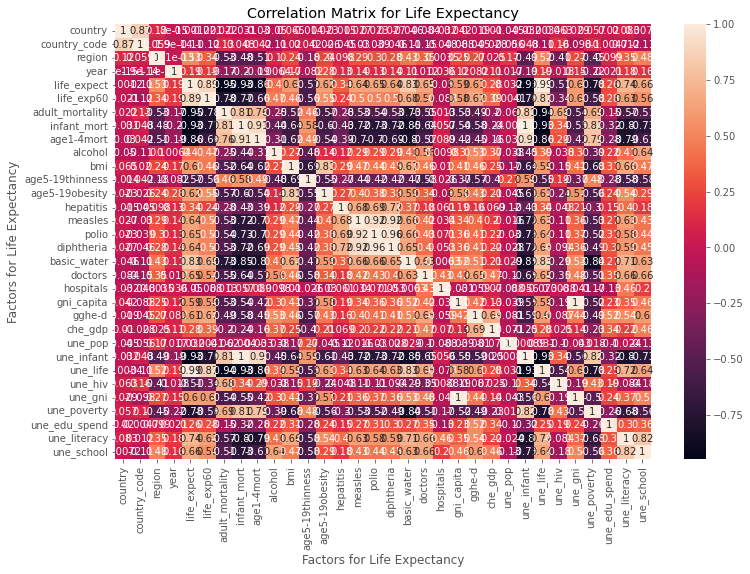

In [5]:
# Create Correlation Heatmap

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Life Expectancy')

plt.xlabel('Factors for Life Expectancy')

plt.ylabel('Factors for Life Expectancy')

plt.show()

In [6]:
# Unstack Correlation Matrix

correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

country     country          1.000000e+00
            country_code     8.665125e-01
            region           1.160386e-01
            year             7.975047e-15
            life_expect     -1.203418e-03
                                 ...     
une_school  une_gni          5.027691e-01
            une_poverty     -5.555648e-01
            une_edu_spend    3.560026e-01
            une_literacy     8.207764e-01
            une_school       1.000000e+00
Length: 1024, dtype: float64

In [7]:
# Sort Correlation Pairs

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

adult_mortality  life_expect       -0.946419
life_expect      adult_mortality   -0.946419
une_life         adult_mortality   -0.943640
adult_mortality  une_life          -0.943640
une_infant       life_expect       -0.931899
                                      ...   
une_hiv          une_hiv            1.000000
une_gni          une_gni            1.000000
une_poverty      une_poverty        1.000000
polio            polio              1.000000
une_school       une_school         1.000000
Length: 1024, dtype: float64

In [23]:
# Find Pairs with High Correlation

high_corr = sorted_pairs[(sorted_pairs)>0.5][(sorted_pairs)<1.0]

print (high_corr.to_string())

life_exp60       polio              0.501654
polio            life_exp60         0.501654
une_school       une_gni            0.502769
une_gni          une_school         0.502769
diphtheria       life_exp60         0.503303
life_exp60       diphtheria         0.503303
                 measles            0.504875
measles          life_exp60         0.504875
gghe-d           basic_water        0.510005
basic_water      gghe-d             0.510005
une_life         region             0.518126
region           une_life           0.518126
gni_capita       basic_water        0.521022
basic_water      gni_capita         0.521022
une_edu_spend    gghe-d             0.521580
gghe-d           une_edu_spend      0.521580
region           life_expect        0.527138
life_expect      region             0.527138
gghe-d           alcohol            0.529580
alcohol          gghe-d             0.529580
basic_water      une_gni            0.532326
une_gni          basic_water        0.532326
gghe-d    

In [24]:
# Get Column Names

print(df.columns.tolist())

['country', 'country_code', 'region', 'year', 'life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis', 'measles', 'polio', 'diphtheria', 'basic_water', 'doctors', 'hospitals', 'gni_capita', 'gghe-d', 'che_gdp', 'une_pop', 'une_infant', 'une_life', 'une_hiv', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school']


<AxesSubplot:xlabel='life_expect', ylabel='une_life'>

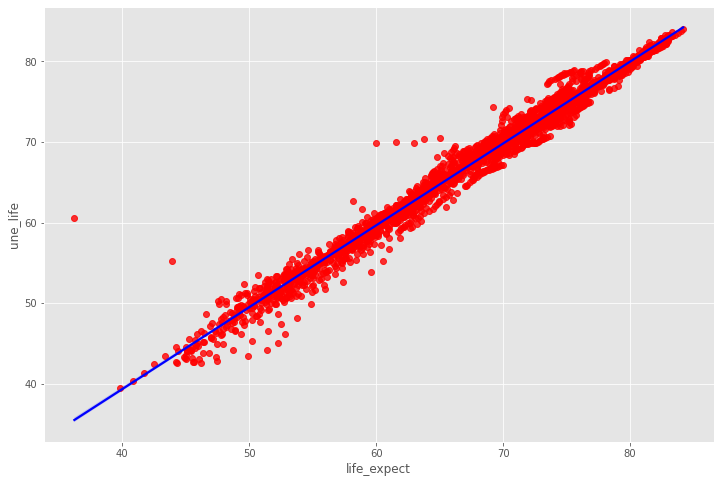

In [25]:
# Compare GHO Calcualated Life Expectancy vs UNESCO Calculated Life Expectancy

sns.regplot(x='life_expect', y='une_life', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='life_expect', ylabel='basic_water'>

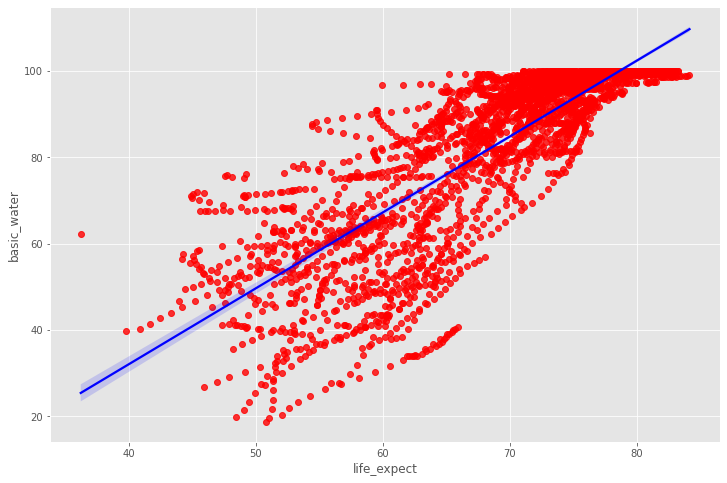

In [26]:
# Plot GHO Calcualated Life Expectancy vs Percent of Population with Basic Water Needs Met

sns.regplot(x='life_expect', y='basic_water', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='life_expect', ylabel='une_literacy'>

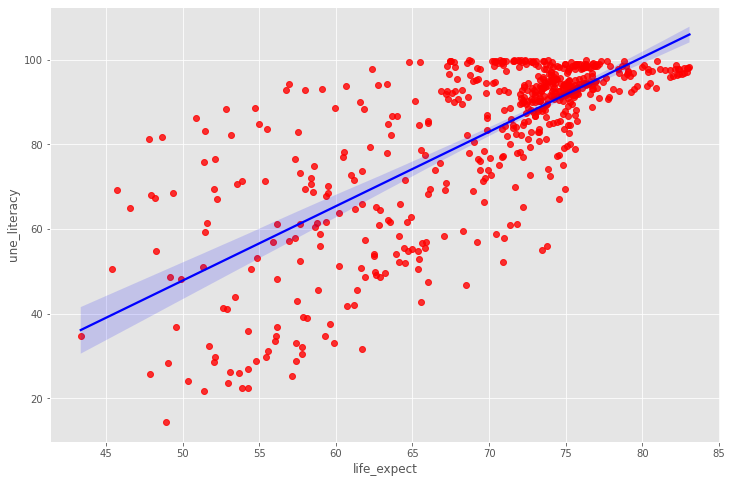

In [27]:
# Plot GHO Calcualated Life Expectancy vs Adult Literacy Rate

sns.regplot(x='life_expect', y='une_literacy', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='life_expect', ylabel='bmi'>

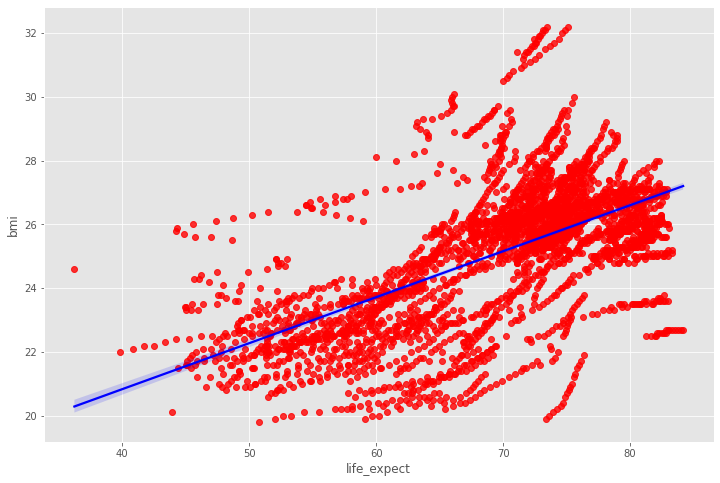

In [28]:
# Plot GHO Calcualated Life Expectancy vs BMI

sns.regplot(x='life_expect', y='bmi', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [29]:
# Find Pairs with High Negative Correlation

high_corr = sorted_pairs[(sorted_pairs)<-0.5][(sorted_pairs)>-1.0]

print (high_corr.to_string())

adult_mortality  life_expect       -0.946419
life_expect      adult_mortality   -0.946419
une_life         adult_mortality   -0.943640
adult_mortality  une_life          -0.943640
une_infant       life_expect       -0.931899
life_expect      une_infant        -0.931899
infant_mort      life_expect       -0.930113
life_expect      infant_mort       -0.930113
une_life         une_infant        -0.928764
une_infant       une_life          -0.928764
infant_mort      une_life          -0.926927
une_life         infant_mort       -0.926927
age1-4mort       life_expect       -0.864414
life_expect      age1-4mort        -0.864414
age1-4mort       une_life          -0.855848
une_life         age1-4mort        -0.855848
basic_water      infant_mort       -0.851514
infant_mort      basic_water       -0.851514
une_infant       basic_water       -0.850791
basic_water      une_infant        -0.850791
                 une_poverty       -0.842559
une_poverty      basic_water       -0.842559
une_infant

<AxesSubplot:xlabel='life_expect', ylabel='une_poverty'>

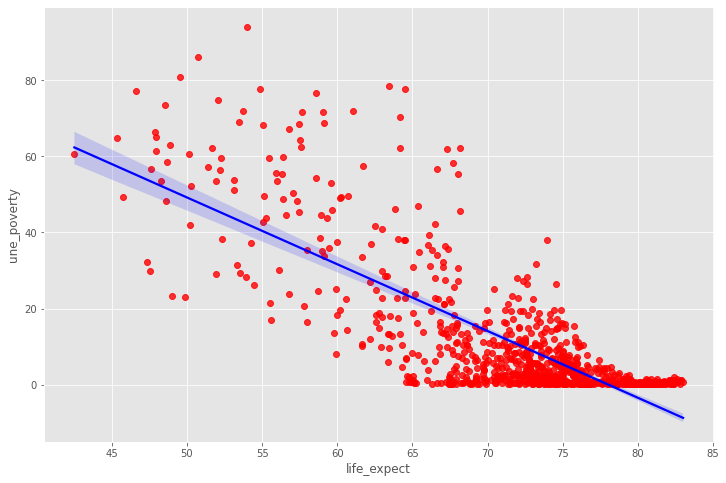

In [30]:
# Plot GHO Calcualated Life Expectancy vs Poverty

sns.regplot(x='life_expect', y='une_poverty', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})